In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Choose the box plot

In [13]:
## There are ten choices

## Time-wise correlation. Test BLEU score.
#bleu_score_type = "test_Simpson"

## Time-wise correlation. Generalization gap.
#bleu_score_type = "gap_Simpson"

## Time-wise correlation. Test BLEU score. Kendall-tau.
#bleu_score_type = "test_Simpson_kendalltau"

## Time-wise correlation. Generalization gap. Kendall-tau.
bleu_score_type = "gap_Simpson_kendalltau"

## Correlations when varying learning rate. Test BLEU score.
#bleu_score_type = 'combined_lr'

## Correlations when varying number of samples. Test BLEU score. Metrics are normalized.
#bleu_score_type = 'combined_sample_normalized'

## Correlations when varying number of samples. Test BLEU score. Metrics are not normalized.
#bleu_score_type = 'combined_sample_unnormalized'

## Correlations when varying model width. Test BLEU score.
#bleu_score_type = 'combined_width'

## Correlations when varying learning rate. Generalization gap.
#bleu_score_type = 'combined_lr_gap'

## Correlations when varying number of samples. Generalization gap. Metrics are normalized.
#bleu_score_type = 'combined_sample_normalized_gap'

## Correlations when varying number of samples. Generalization gap. Metrics are not normalized.
#bleu_score_type = 'combined_sample_unnormalized_gap'

## Correlations when varying model width. Generalization gap.
#bleu_score_type = 'combined_width_gap'

In [14]:
## Get data

def merge_two_dicts(rank_correlations_aggregated_1, rank_correlations_aggregated_2):
    rank_correlations_aggregated_merged = {}
    for key in rank_correlations_aggregated_1:
        rank_correlations_aggregated_merged[key] = rank_correlations_aggregated_1[key]
        if key in rank_correlations_aggregated_2:
            rank_correlations_aggregated_merged[key] += rank_correlations_aggregated_2[key]
    return rank_correlations_aggregated_merged

rank_correlations_min = None
rank_correlations_ave = None

if bleu_score_type == 'test_Simpson':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT.pkl', 'rb'))
elif bleu_score_type == 'gap_Simpson':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_gap_Simpson_WMT.pkl', 'rb'))
elif bleu_score_type == 'test_Simpson_kendalltau':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_test_Simpson_WMT_kendalltau.pkl', 'rb'))
elif bleu_score_type == 'gap_Simpson_kendalltau':
    rank_correlations_aggregated = pickle.load(open('../results/plot_results_gap_Simpson_WMT_kendalltau.pkl', 'rb'))
elif bleu_score_type == "combined_lr":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_lr_id_bleu_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_lr_id_bleu_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
elif bleu_score_type == "combined_sample_normalized":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
elif bleu_score_type == "combined_sample_unnormalized":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_not_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_not_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
elif bleu_score_type == "combined_width":
    plot_results = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_width_id_bleu_normalized_by_samples.pkl'
    rank_correlations_aggregated = pickle.load(open(f'../results/{plot_results}', 'rb'))
elif bleu_score_type == "combined_lr_gap":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_lr_id_bleu_gap_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_lr_id_bleu_gap_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
elif bleu_score_type == "combined_sample_normalized_gap":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_gap_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_gap_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
elif bleu_score_type == "combined_sample_unnormalized_gap":
    plot_results_1 = f'plot_results_test_Simpson_WMT14_size_param_depth_individual_param_sample_id_bleu_gap_not_normalized_by_samples.pkl'
    plot_results_2 = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_sample_id_bleu_gap_not_normalized_by_samples.pkl'
    rank_correlations_1 = pickle.load(open(f'../results/{plot_results_1}', 'rb'))
    rank_correlations_2 = pickle.load(open(f'../results/{plot_results_2}', 'rb'))
    rank_correlations_aggregated = merge_two_dicts(rank_correlations_1, rank_correlations_2)
elif bleu_score_type == "combined_width_gap":
    plot_results = f'plot_results_test_Simpson_WMT14_size_param_width_individual_param_width_id_bleu_gap_normalized_by_samples.pkl'
    rank_correlations_aggregated = pickle.load(open(f'../results/{plot_results}', 'rb'))

In [15]:
## Defining the group labels
shape_metrics = ['stable_rank', 'mp_softrank', 'KS_distance', 'alpha', 'exp_dist_exponent', 'lognormal_sigma', 
                 'rand_distance', 'entropy', 'bulk_mean_vec_entropy', 'tail_mean_vec_entropy', 'exponent', 'pl_alpha', 
                 'e_tpl_lambda', 'tpl_lambda', 'e_tpl_beta', 'e_tpl_lambda_adjusted', 'exp_lambda', 
                 'e_tpl_ks_distance', 'pl_ks_distance']
scale_metrics = ['W_CKA', 'L2', 'L2_DIST', 'INVERSE_MARGIN', 'LOG_PROD_OF_SPEC', 'LOG_SUM_OF_SPEC', 
                 'LOG_PROD_OF_SPEC_OVER_MARGIN', 'LOG_SPEC_INIT_MAIN', 'LOG_SPEC_ORIG_MAIN', 
                'LOG_SUM_OF_SPEC_OVER_MARGIN', 'LOG_PROD_OF_FRO', 'LOG_SUM_OF_FRO', 'LOG_PROD_OF_FRO_OVER_MARGIN', 
                'LOG_SUM_OF_FRO_OVER_MARGIN', 'FRO_DIST', 'DIST_SPEC_INIT', 'PARAM_NORM', 'PATH_NORM', 
                'PATH_NORM_OVER_MARGIN', 'PACBAYES_INIT', 'PACBAYES_ORIG', 'PACBAYES_FLATNESS', 'PACBAYES_MAG_INIT', 
                'PACBAYES_MAG_ORIG', 'PACBAYES_MAG_FLATNESS', 'log_norm', 'log_spectral_norm', ]
hybrid_metrics = ['alpha_weighted', 'log_alpha_norm', ]

# Some metrics are not included in the paper. They are repeated or being studied.
del_metrics = ['w_cka', 'bulk_mean_vec_entropy', 'tail_mean_vec_entropy', 'lognormal_sigma', 'l2', 'l2_dist', 
               'log_prod_of_spec', 'log_sum_of_spec','log_prod_of_fro', 'log_sum_of_fro', 
              'rand_distance', 'entropy', 'e_tpl_lambda_adjusted', 'log_spec_orig_main', 'log_spec_init_main']

all_keys = [x for x in rank_correlations_aggregated.keys()]

for metric in all_keys:
    if metric.lower() in del_metrics:
        del rank_correlations_aggregated[metric]

# There are 28 metrics in total
assert len(rank_correlations_aggregated.keys()) == 28

## Generate box plot

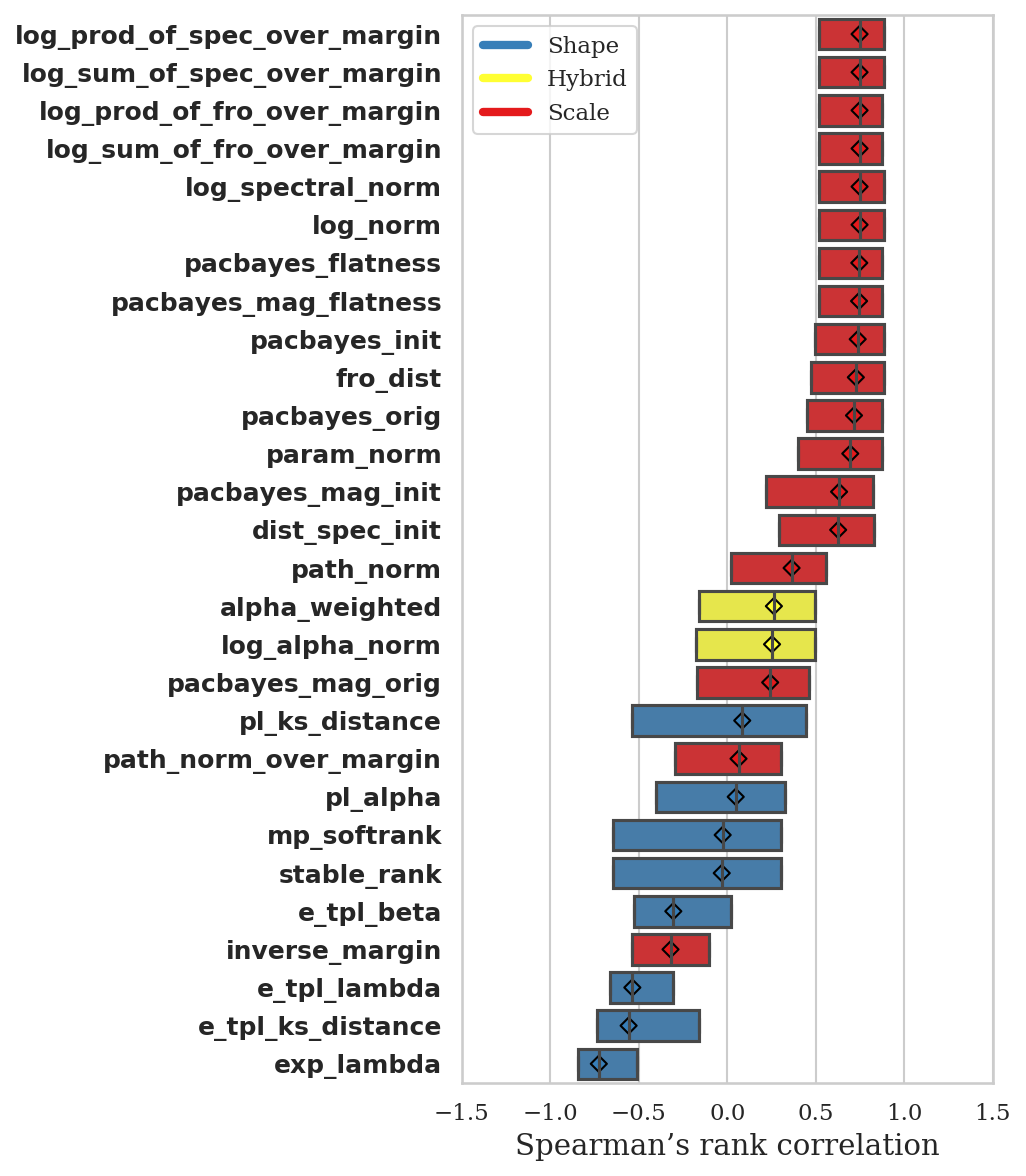

In [16]:
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(style='whitegrid', font="serif")

## Prepare data
ix = np.flip(np.argsort([np.median(z) for z in rank_correlations_aggregated.values()]))
keys = np.array(list(rank_correlations_aggregated.keys()))[ix]
values = np.array(list(rank_correlations_aggregated.values()))[ix]
y = np.concatenate([[k]*len(rank_correlations_aggregated[k]) for k in keys])
x = np.concatenate(list(values))
y = [a.lower() for a in y]

## Define colors
palette = {}
## these are slightly more visible colors, we could try others though
colors = ["#377eb8", "#ffff33", "#e41a1c"]
shape_metrics = [a.lower() for a in shape_metrics]
scale_metrics = [a.lower() for a in scale_metrics]
hybrid_metrics = [a.lower() for a in hybrid_metrics]

for key in y:
    if key in shape_metrics:
        palette[key] = colors[0]
    elif key in scale_metrics:
        palette[key] = colors[2]
    else:
        palette[key] = colors[1]
        
## Show box plots
plt.rcParams['figure.dpi'] = 150
fig, ax = plt.subplots(figsize=(7,8))

for label in ax.get_yticklabels():
    label.set_fontproperties('Courier New')
    label.set_fontweight('bold')

custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

sns.boxplot(x = x, y = y, orient='h', ax=ax, palette=palette, whis=0, showfliers=False)
plt.scatter(x=np.median(values, axis=1), 
            y=range(len(values)), 
            c=[palette[k.lower()] for k in keys], 
            s=30, marker="D",
            edgecolor='black')
ax.set_xlim(-1.5,1.5)
ax.set_xlabel(r'Spearman’s rank correlation', fontsize=14)
ax.legend(custom_lines, ['Shape', 'Hybrid', 'Scale'], loc= 'upper left')
plt.tight_layout()
plt.savefig(f'boxplot_{bleu_score_type}.pdf')
#plt.show()